In [ ]:
import pandas as pd
import seaborn as sns

In [48]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

In [ ]:
titanic.isna().sum() / len(titanic) * 100

In [ ]:
titanic.describe()

In [ ]:
titanic.describe(include=["object", "category"])

In [ ]:
titanic2 = titanic.astype({"fare": "object", "age": "object", "sex": "category"})
titanic2.info()

In [ ]:
titanic2.loc[0, "class"] = "First"
titanic2.head()

In [ ]:
titanic2["sex"].unique()

In [ ]:
titanic2["sex"].value_counts()

### (Cleanup)

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [105]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [52]:
# remove the "deck" column
titanic.drop(columns="deck", inplace=True)


In [104]:
titanic["embark_town"].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [54]:
# Fill NA in "embark_town" with mode (most common value)
mode_town = titanic["embark_town"].mode()[0]
titanic["embark_town"].fillna(mode_town, inplace=True)

titanic["embarked"].fillna(titanic["embarked"].mode()[0], inplace=True)

In [47]:
# Alternatively, remove all rows with NA in "embark_town"
titanic.dropna(subset=["embarked"], inplace=True)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone


<Axes: xlabel='age', ylabel='Count'>

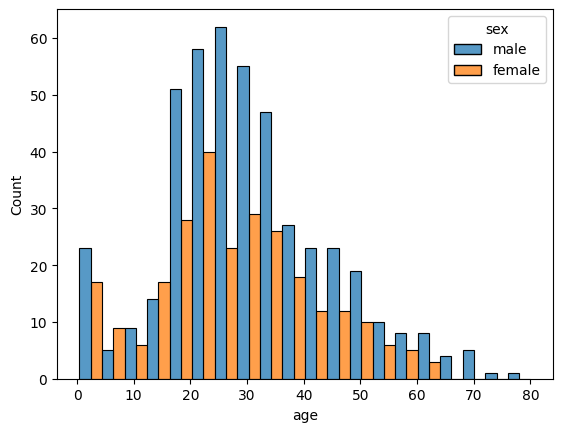

In [74]:
# let's take a look at age
sns.histplot(x="age", hue="sex", multiple="dodge", data=titanic)

In [83]:
median_age_male = titanic[titanic["sex"] == "male"]["age"].median()
median_age_male = titanic.query("sex == 'male'")["age"].median()

median_age_female = titanic[titanic["sex"] == "female"]["age"].median()
median_age_female = titanic.query("sex == 'female'")["age"].median()

In [103]:
# fill NA in "age" for male passengers
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_age_male)

# fill NA in "age" for female passengers
titanic["age"] = titanic["age"].fillna(median_age_female)